**<h1> IMAGE RECOGNITION PROJECT**

**<h3>About the Data</h3>**
<h4>The dataset is called CIFAR-10 which consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.</h4>

<h4>The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.</h4>

<h4>The label data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10. <br>
airplane : 0 <br>
automobile : 1 <br>
bird : 2 <br>
cat : 3 <br>
deer : 4 <br>
dog : 5 <br>
frog : 6 <br>
horse : 7 <br>
ship : 8 <br>
truck : 9

<h2>Importing the Libraries</h2>

In [17]:
#importing the necessary libraries
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np

<h2>Preprocessing the Data</h2>

In [2]:
#load the dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

170500096/170498071 [==============================] - 15s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


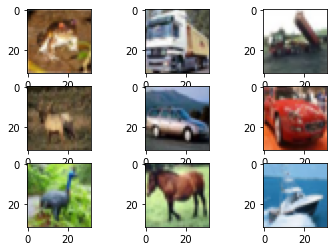

In [3]:
#plot some of the images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i])
# show the figure
plt.show()

In [4]:
#convert data type and normalize the values
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm/255
test_norm = train_norm/255

In [5]:
#preprocessing the class labels
trainy= to_categorical(trainy)
testy= to_categorical(testy)

<h2>Defining the CNN Model</h2>

In [6]:
#define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

<h2>Compiling and Evaluating the model for Training and Validation Sets</h2>

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_fit=model.fit( trainX, trainy, validation_data= (testX,testy), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2254 - accuracy: 0.9225 - val_loss: 0.4638 - val_accuracy: 0.8682
Epoch 2/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2194 - accuracy: 0.9246 - val_loss: 0.4438 - val_accuracy: 0.8718
Epoch 3/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2160 - accuracy: 0.9257 - val_loss: 0.4654 - val_accuracy: 0.8661
Epoch 4/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2162 - accuracy: 0.9259 - val_loss: 0.4982 - val_accuracy: 0.8621
Epoch 5/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2138 - accuracy: 0.9256 - val_loss: 0.4390 - val_accuracy: 0.8714
Epoch 6/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.2120 - accuracy: 0.9279 - val_loss: 0.4466 - val_accuracy: 0.8682
Epoch 7/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.2061 - accuracy: 0.9287 - val_loss: 0.4445 -

<h2>Visualiation</h2>

<h3>1. Plotting the loss of Training and Validation Sets</h3>

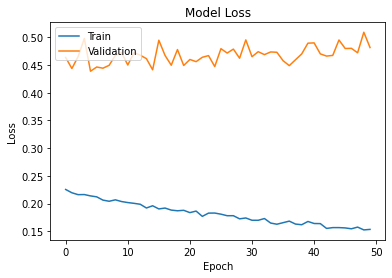

In [14]:
#plotting the losses on training set
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h3>2. Plotting Accuracy of Training and Validation Sets</h3>

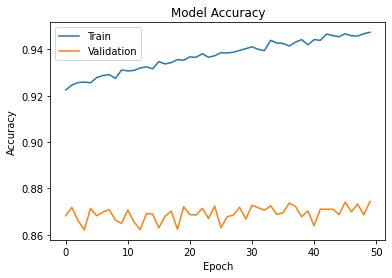

In [13]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h3>3. Confusion Matrix </h3>

Confusion matrix, without normalization
[[865   7  24  17  11   0  10  10  34  22]
 [  5 928   1   3   2   0   4   0   8  49]
 [ 25   0 784  40  52  37  41  13   4   4]
 [  7   4  22 764  34 105  46   8   6   4]
 [  6   0  18  30 886  14  21  22   3   0]
 [  6   1  12 104  24 821  10  16   0   6]
 [  2   1  14  23  17   5 930   3   1   4]
 [  7   0   7  15  26  28   3 910   1   3]
 [ 28   9   4   6   0   4   7   2 921  19]
 [  7  28   2   8   1   4   3   1  11 935]]


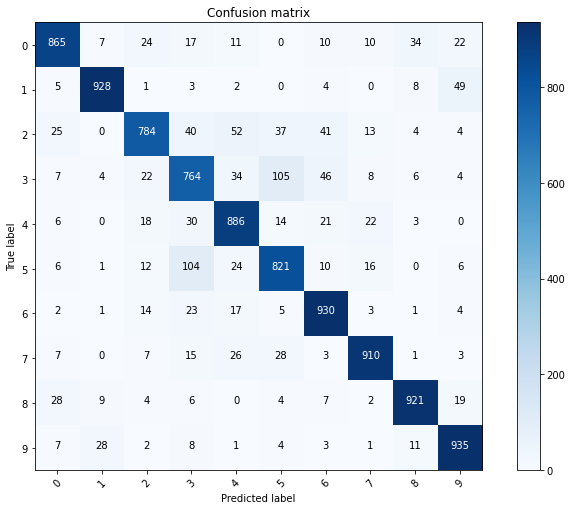

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
      print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

rounded_y=np.argmax(testy, axis=1)
p_test = model.predict(testX).argmax(axis=1)
cm = confusion_matrix(rounded_y, p_test)
plot_confusion_matrix(cm, list(range(10)))

<h2>Display Predictions</h2>

<h3>1.Labels</h3>

In [19]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

<h3>2. Correct Prediction</h3>

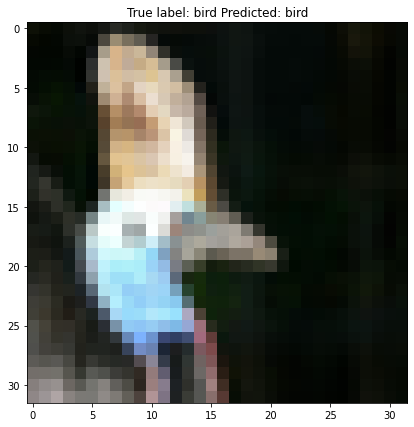

In [21]:
misclassified_idx = np.where(p_test == rounded_y)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(testX[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[rounded_y[i]], labels[p_test[i]]));

<h2> 2. Wrong Prediction </h2>

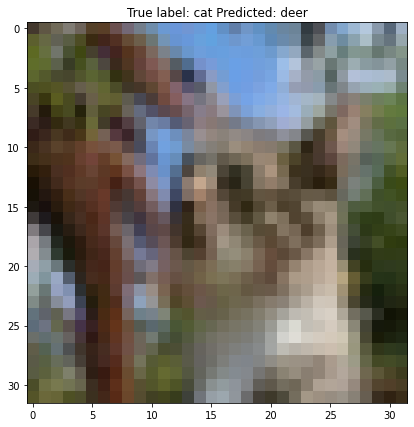

In [22]:
misclassified_idx = np.where(p_test != rounded_y)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(testX[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[rounded_y[i]], labels[p_test[i]]));

<h2>Project by:<br>
Manasvi Logani</h2>






<h2> References: </h2>


*   Machinelearningmastery.com
*   deeplearning.ai
* Kaggle: CIFAR-10 project by Kushal Bhavsar
* tensorflow.org
* elitedatascience.com
* stackoverflow

